In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


file_path = '/Users/LENOVO/resume detection/UpdatedResumeDataSet.csv'  
resumeDataSet = pd.read_csv(file_path, encoding='utf-8')


resumeDataSet['cleaned_resume'] = ''


resumeDataSet.head()


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [15]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [16]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


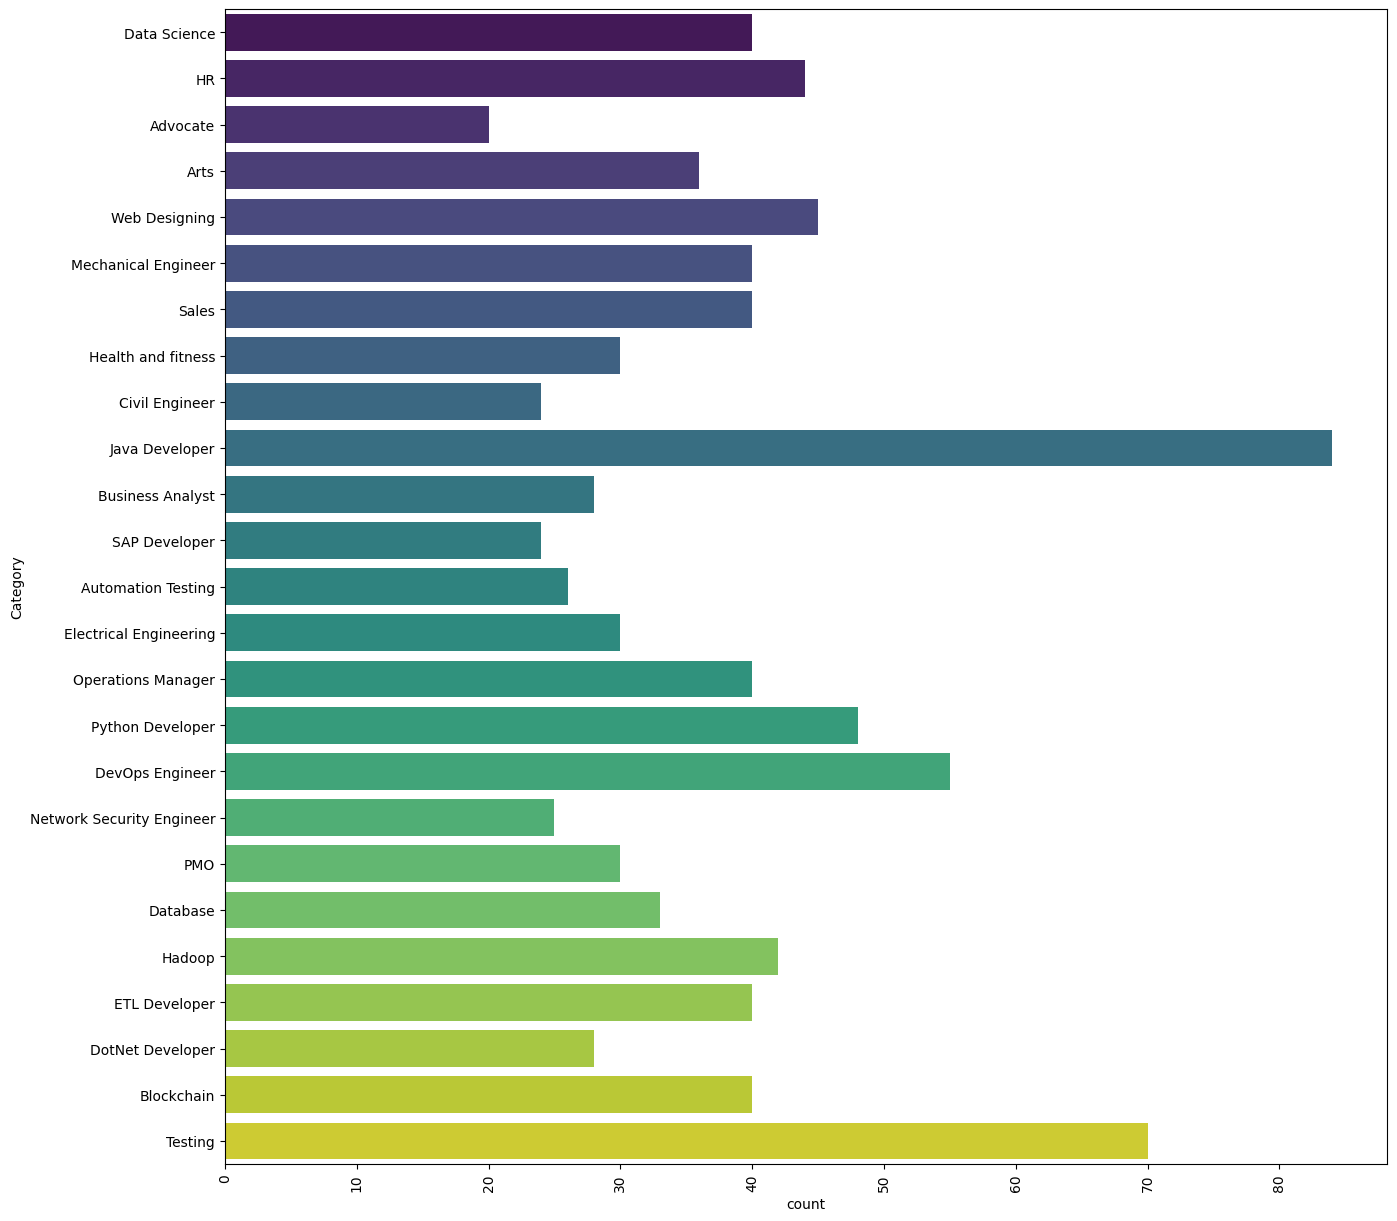

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.xticks(rotation=90)


sns.countplot(y="Category", data=resumeDataSet, palette='viridis')

plt.show()


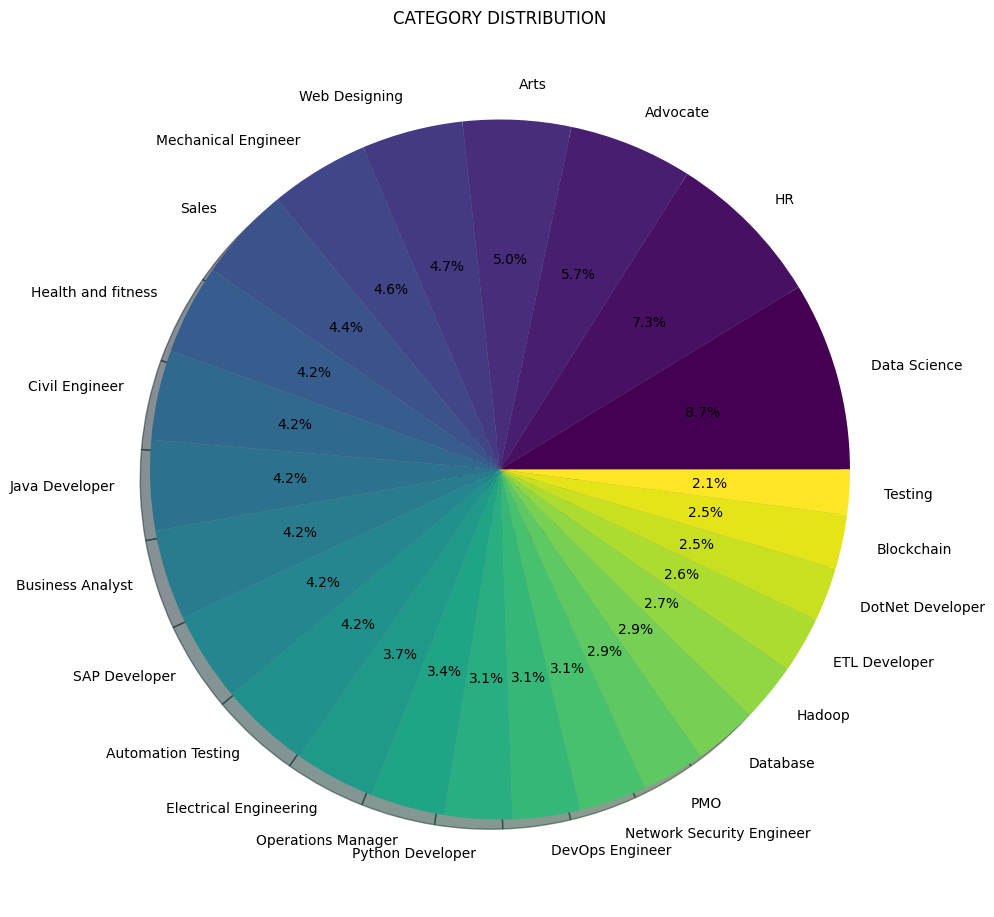

In [18]:
from matplotlib.gridspec import GridSpec
import numpy as np
import matplotlib.pyplot as plt


targetCounts = resumeDataSet['Category'].value_counts()
targetLabels = resumeDataSet['Category'].unique()


plt.figure(1, figsize=(25, 25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('viridis') 
colors = [cmap(i) for i in np.linspace(0, 1, len(targetCounts))]  

plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')


source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)


plt.show()


In [19]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) 
    resumeText = re.sub('RT|cc', ' ', resumeText)  
    resumeText = re.sub('#\S+', '', resumeText)  
    resumeText = re.sub('@\S+', '  ', resumeText)  
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [20]:
def clean(text):
    """
    Clean the input text by removing URLs, emails, special characters, and stop words.
    
    :param text: The string to be cleaned
    :return: The cleaned string
    """

   
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    
    
    clean_text = url_pattern.sub('', text)
   
    clean_text = email_pattern.sub('', clean_text)
    
    
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    
   
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text

In [22]:
resumeDataSet["Resume"][0]


'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [23]:
print(resumeDataSet.columns)  
print(resumeDataSet.head())  


Index(['Category', 'Resume', 'cleaned_resume'], dtype='object')
       Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

                                      cleaned_resume  
0  Skills Programming Languages Python pandas num...  
1  Education Details May 2013 to May 2017 B E UIT...  
2  Areas of Interest Deep Learning Control System...  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4  Education Details MCA YMCAUST Faridabad Haryan...  


In [24]:
resumeDataSet["Resume"].iloc[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [25]:
df = resumeDataSet


In [26]:
def clean(text):
 
    text = text.lower()  
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove special characters
    return text


In [27]:
print(df.columns)


Index(['Category', 'Resume', 'cleaned_resume'], dtype='object')


In [28]:
df["Resume"] = df["Resume"].apply(lambda x: clean(x))


In [29]:
df["Resume"][0]

'skills  programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery  machine learning regression svm naãve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca  neural nets  database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau  others regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learningeducation details \r\n\r\ndata science assurance associate \r\n\r\ndata science assurance associate  ernst  young llp\r\nskill details \r\njavascript exprience  24 months\r\njquery exprience  24 months\r\npython exprience  24 monthscompany details \r\ncompany  ernst  young llp\r\ndescription  fraud investigations and dispute services   assurance\r\ntechnology assisted review\r\ntar t

In [30]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


le.fit(df["Category"])


df["Encoded_Category"] = le.transform(df["Category"])

print(df[["Category", "Encoded_Category"]].head())


       Category  Encoded_Category
0  Data Science                 6
1  Data Science                 6
2  Data Science                 6
3  Data Science                 6
4  Data Science                 6


In [31]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [33]:

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
tfidf.fit(df["Resume"])


tfidf_matrix = tfidf.transform(df["Resume"])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


TF-IDF matrix shape: (962, 8154)


In [34]:
from sklearn.model_selection import train_test_split


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


tfidf = TfidfVectorizer()

resume = tfidf.fit_transform(df["Resume"])


X_train, X_test, y_train, y_test = train_test_split(
    resume, df["Category"], test_size=0.2, random_state=4
)


print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 769, Test set size: 193


In [36]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [37]:
X_train.shape, y_train.shape

((769, 8154), (769,))

In [38]:
clf = KNeighborsClassifier()


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy of the KNN classifier on test set: {accuracy:.2f}')

Accuracy of the KNN classifier on test set: 0.96


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB()
}

accuracy_scores = {}

for model_name, model in models.items():
   
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    
    print(f'Accuracy of {model_name} on test set: {accuracy:.2f}')

Accuracy of KNeighborsClassifier on test set: 0.96
Accuracy of LogisticRegression on test set: 0.99
Accuracy of RandomForestClassifier on test set: 0.99
Accuracy of SVC on test set: 0.99
Accuracy of MultinomialNB on test set: 0.84
